      lean  year
0   2.9642  1975
1   2.9644  1976
2   2.9656  1977
3   2.9667  1978
4   2.9673  1979
5   2.9688  1980
6   2.9696  1981
7   2.9698  1982
8   2.9713  1983
9   2.9717  1984
10  2.9725  1985
11  2.9742  1986
12  2.9757  1987


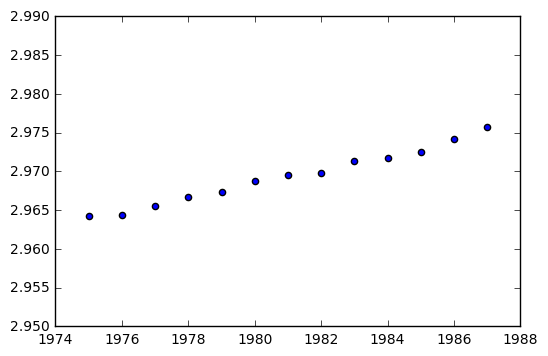

In [2]:
import pandas
import matplotlib.pyplot as plt

#Input Tower of Piza off-axis distance data
pisa = pandas.DataFrame({"year": range(1975, 1988),
  "lean": [2.9642, 2.9644, 2.9656, 2.9667, 2.9673, 2.9688, 2.9696,
  2.9698, 2.9713, 2.9717, 2.9725, 2.9742, 2.9757]})

print(pisa)

#Plot data
plt.scatter(pisa['year'],pisa['lean'])
plt.show()

In [3]:
import statsmodels.api as sm

#Use statsmodel library for detailed linear fit
y = pisa.lean # target
X = pisa.year # features
X = sm.add_constant(X) # add a column of 1's as the constant term

# OLS -- Ordinary Least Squares Fit
linear = sm.OLS(y, X)
# fit model
linearfit = linear.fit()

print(linearfit.summary())

                            OLS Regression Results                            
Dep. Variable:                   lean   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     904.1
Date:                Sat, 27 May 2017   Prob (F-statistic):           6.50e-12
Time:                        09:38:02   Log-Likelihood:                 83.777
No. Observations:                  13   AIC:                            -163.6
Df Residuals:                      11   BIC:                            -162.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1233      0.061     18.297      0.0

C:\Users\Steve\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [4]:
# Our predicted values of y
yhat = linearfit.predict(X)
print(yhat)

#Calculate residuals
residuals = y - yhat

[ 2.96377802  2.96470989  2.96564176  2.96657363  2.96750549  2.96843736
  2.96936923  2.9703011   2.97123297  2.97216484  2.9730967   2.97402857
  2.97496044]


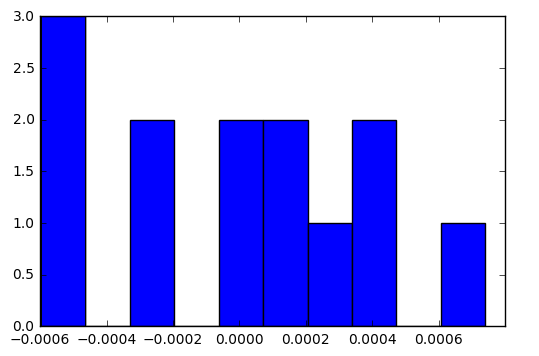

In [7]:
#Plot histogram of residuals
plt.hist(residuals, bins = 10)
plt.show()

#Residuals do not appear to be normal

In [12]:
import numpy as np
#Calculate SSE, RSS, TSS, R^2

# sum the (predicted - observed) squared
SSE = np.sum((y.values-yhat)**2)
mean = np.mean(y.values)
RSS = np.sum((yhat - mean)**2)
TSS = np.sum((y.values-mean)**2)

R2 = 1-SSE/TSS
print ('SSE:', SSE)
print ('RSS:', RSS)
print ('TSS:', TSS)
print ('R2:', R2)

SSE: 1.92285714286e-06
RSS: 0.000158044835165
TSS: 0.000159967692308
R2: 0.987979715684


In [16]:
#Assuming no external forces on the tower, how many meters will the tower of Pisa lean in 15 years?
#Assign the number of meters moved to variable delta.

# Print the models summary
print(linearfit.summary())


#The models parameters
print("\n\n",linearfit.params)
delta = 15*linearfit.params.year
print('\n\nDelta:', delta)

                            OLS Regression Results                            
Dep. Variable:                   lean   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     904.1
Date:                Sat, 27 May 2017   Prob (F-statistic):           6.50e-12
Time:                        10:03:45   Log-Likelihood:                 83.777
No. Observations:                  13   AIC:                            -163.6
Df Residuals:                      11   BIC:                            -162.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1233      0.061     18.297      0.0

C:\Users\Steve\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [18]:
#Compute variance of coefficients
mean = np.mean(pisa.year)
s2b1 = SSE/(len(y)-2)/np.sum((pisa.year - mean)**2)

print ('s2b1:', s2b1)

s2b1: 9.60468103325e-10


In [19]:
#T-distribution example
from scipy.stats import t

# 100 values between -3 and 3
x = np.linspace(-3,3,100)

# Compute the pdf of a t distribution with 3 degrees of freedom
print(t.pdf(x=x, df=3))

[ 0.02297204  0.02441481  0.02596406  0.02762847  0.0294174   0.031341
  0.03341025  0.03563701  0.03803403  0.04061509  0.04339497  0.04638952
  0.04961567  0.05309149  0.05683617  0.06086996  0.0652142   0.06989116
  0.07492395  0.08033633  0.08615245  0.09239652  0.0990924   0.10626304
  0.11392986  0.12211193  0.13082504  0.14008063  0.14988449  0.16023537
  0.17112343  0.18252859  0.1944188   0.20674834  0.21945618  0.23246464
  0.2456783   0.2589835   0.27224841  0.28532401  0.29804594  0.31023748
  0.32171351  0.33228555  0.34176766  0.34998293  0.35677032  0.36199128
  0.36553585  0.36732769  0.36732769  0.36553585  0.36199128  0.35677032
  0.34998293  0.34176766  0.33228555  0.32171351  0.31023748  0.29804594
  0.28532401  0.27224841  0.2589835   0.2456783   0.23246464  0.21945618
  0.20674834  0.1944188   0.18252859  0.17112343  0.16023537  0.14988449
  0.14008063  0.13082504  0.12211193  0.11392986  0.10626304  0.0990924
  0.09239652  0.08615245  0.08033633  0.07492395  0.06

In [21]:
#Calculate T-statistic
# The variable s2b1 is in memory. The variance of beta_1
tstat = linearfit.params['year']/ (s2b1**0.5)
print ('T statistic:', tstat)
print (linearfit.params )

T statistic: 30.0685846877
const    1.123338
year     0.000932
dtype: float64


In [24]:
#Perform T-test
beta1_test = False

# At the 95% confidence interval for a two-sided t-test we must use a p-value of 0.975
pval = 0.975

# The degrees of freedom
df = pisa.shape[0] - 2

# The probability to test against
p = t.cdf(tstat, df=df)

if p>0.975:
    beta1_test = True
else:
    beta1_test = False
    
print ('Does Tower of Piza leaning depend on year? ', beta1_test)

Does Tower of Piza leaning depend on year?  True
